# 10-test-stl.ipynb

This notebook performs the segmentation workflow adapted for the compressed F50 sand experiment and adds a step to convert the segmented voxels to tri-meshes to be saved as STLs.

# Import packages

In [3]:
# Set to False to use matplotlib.pyplot to view 2D images one at a time
use_napari = True
# Standard library imports
import math
from pathlib import Path
import sys
# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, exposure, filters, measure
# Local module imports
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)
import segmentflow.segment as sf
# Enable autoreload packages for changes made to local modules
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Perform Segmentation

## Load 3D data

Passing `slice_crop`, `row_crop`, and `col_crop` to only load part of the dataset

In [6]:
# Load images as 3D array from a directory containing images
imgs = sf.load_images(
    r'C:\Users\gusb\Research\PSAAP\PetaLibrary\F63tiff',
    slice_crop=[400, 550],
    row_crop=[400, 550],
    col_crop=[400, 550],
    convert_to_float=True,
    file_suffix='tiff'
)

Loading images...
--> Images loaded as 3D array:  (150, 150, 150)
Images loaded as 3D array: (150, 150, 150)


## Preprocess data

In [14]:
imgs_pre = sf.preprocess(
    imgs, median_filter=True, rescale_intensity_range=[5, 95]
)

Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [5, 95]...
--> Preprocessing complete


## Binarize data

In [15]:
imgs_binarized, thresh_vals = sf.binarize_multiotsu(
    imgs, n_otsu_classes=3, n_selected_thresholds=1
)

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.


## Segment Data

In [10]:
segment_dict = sf.watershed_segment(
    imgs_binarized,
    min_peak_distance=7,
    return_dict=True
)

Segmenting images...
--> Segmentation complete. 532 particle(s) segmented.


# Visualizations

Plotting images: [55, 100]


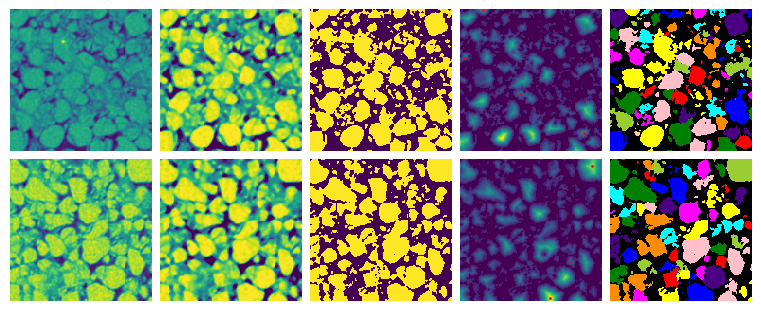

In [21]:
fig, axes = sf.plot_segment_steps(
    imgs, imgs_pre, imgs_binarized, segment_dict, slices=[55, 100]
)
plt.show()